# DS-210: Programming for Data Science


# Lecture 10: Measuring errors for regression. Loss functions.


## Reminders

Homework:

* Please start your homework from `Collaborators: ???`
* `Collaborators: none` if no collaborators

Typical predictive data analysis pipeline:

* **Very important:** split your data into a training and test part
* Train your model on the training part
* Use the testing part to evaluate accuracy

## Importing libraries we will use today

In [1]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import math

## Measuring errors for regression

* Usually, the predictor is not ideal
* How do I evaluate different options and choose the best one?

**Mean Squared Error (or $L_2$ loss):**

$$\frac{1}{n}\sum_{i = 1}^n \left(f(x_i) - y_i\right)^2$$

**Mean Absolute Error (or $L_1$ loss):**

$$\frac{1}{n}\sum_{i = 1}^n \left| f(x_i) - y_i\right|$$

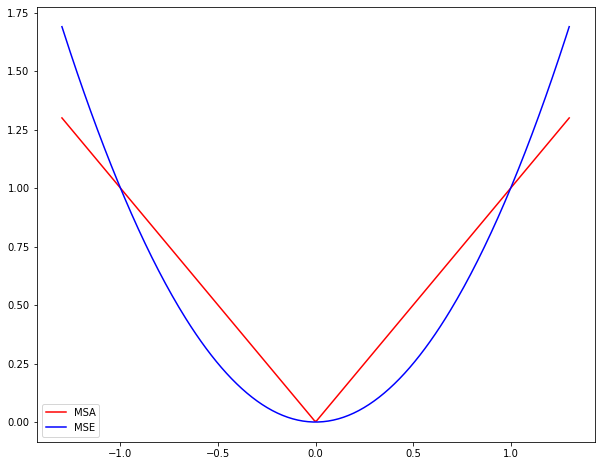

In [2]:
xs = np.linspace(-1.3,1.3,num=300)
plt.figure(figsize=(10,8))
plt.plot(xs,np.abs(xs),"r-",xs,xs**2,"b-")
plt.legend(["MSA","MSE"]);

## Definition of an outlier

<br>
<br><br><br>
<div align="center">
    <b>A point or small set of points that are <i>"different"</i></b>
</div>


<br>
<br>
<br>
<br>
<br>
<b>Important difference between error measures:</b> different attention to outliers

## Constructing an example with outliers

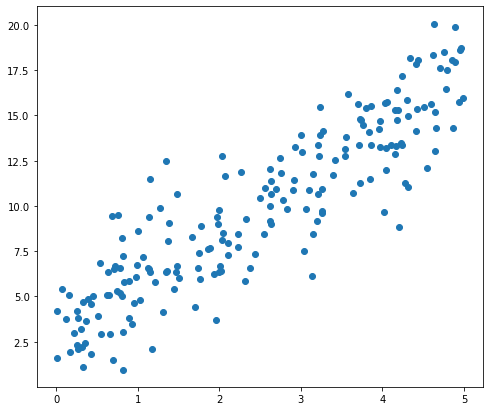

In [3]:
A,B = 0.0,5.0
RANGE = np.array([A,B])

SAMPLES = 200
x = np.random.uniform(low=A,high=B,size=SAMPLES)
y = x * math.e + math.pi \
    + np.random.normal(scale=2, size=SAMPLES)
plt.figure(figsize=(8,7))
plt.plot(x,y,"o");

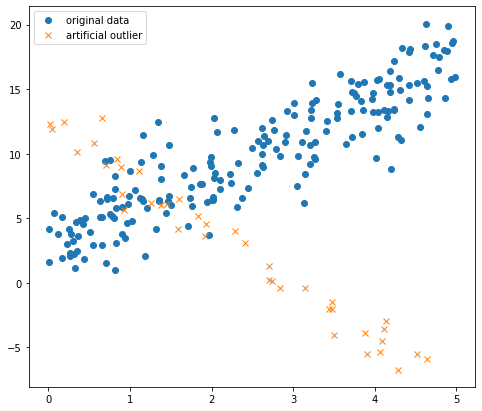

In [4]:
SAMPLES_2 = 40
x_2 = np.random.uniform(low=A,high=B,size=SAMPLES_2)
y_2 = x_2 * - 4 + 12 \
    + np.random.normal(scale=1, size=SAMPLES_2)
x_c = np.concatenate((x,x_2))
y_c = np.concatenate((y,y_2))
plt.figure(figsize=(8,7))
plt.plot(x,y,"o",x_2,y_2,"x")
plt.legend(["original data","artificial outlier"]);

## Linear Regression with Mean Squared Error

[2.77656518 2.96212176]


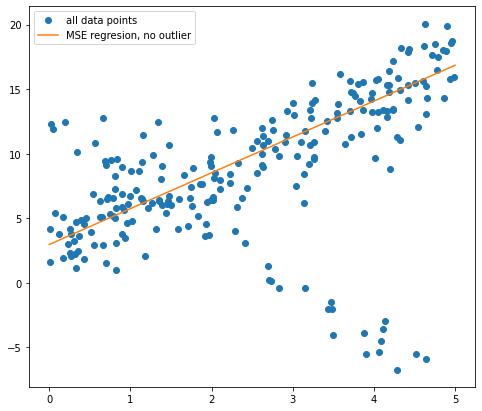

In [5]:
# apply a linear transform
def F(x,c):
    return x * c[0] + c[1]

def error(c):
    return F(x,c) - y

sol_mse = least_squares(error,[0.0,0.0]).x
print(sol_mse)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o",
         RANGE,F(RANGE,sol_mse),"-");
plt.legend(["all data points",
            "MSE regresion, no outlier"]);

[1.81789917 4.24155588]


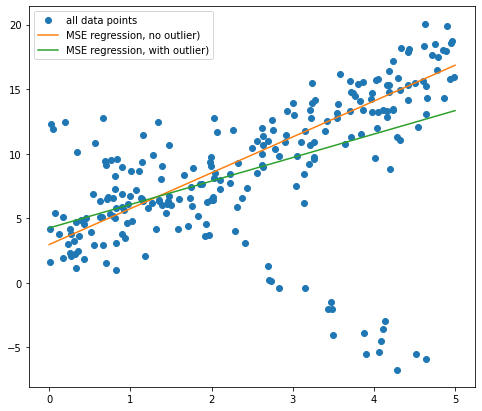

In [6]:
def error(c):
    return F(x_c,c) - y_c

sol_mse_2 = least_squares(error,[0.0,0.0]).x
print(sol_mse_2)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o",
         RANGE,F(RANGE,sol_mse),"-",
         RANGE,F(RANGE,sol_mse_2),"-")
plt.legend(["all data points",
            "MSE regression, no outlier)",
            "MSE regression, with outlier)"]);

## Linear Regression with Mean Absolute Error

[2.79244327 2.9804278 ]


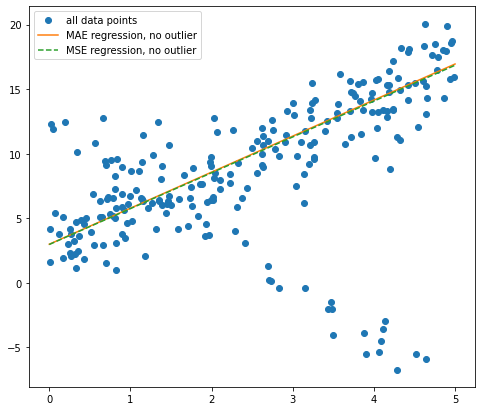

In [7]:
def error(c):
    return np.sqrt(np.abs(F(x,c) - y))

sol_mae = least_squares(error,[0.0,0.0]).x
print(sol_mae)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o",
         RANGE,F(RANGE,sol_mae),"-",
         RANGE,F(RANGE,sol_mse),"--");
plt.legend(["all data points",
            "MAE regression, no outlier",
            "MSE regression, no outlier"]);

[2.58027493 3.22709177]


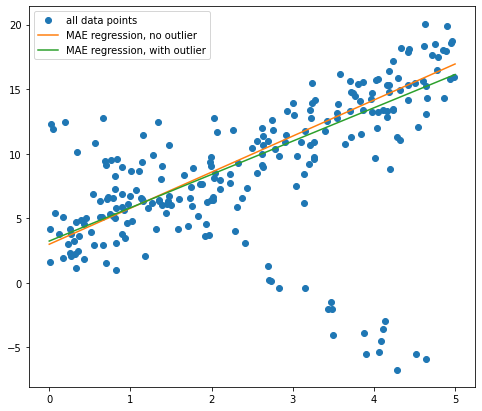

In [8]:
def error(c):
    return np.sqrt(np.abs(F(x_c,c) - y_c))

sol_mae_2 = least_squares(error,[0.0,0.0]).x
print(sol_mae_2)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o",
         RANGE,F(RANGE,sol_mae),"-",
         RANGE,F(RANGE,sol_mae_2),"-");
plt.legend(["all data points",
            "MAE regression, no outlier",
            "MAE regression, with outlier"]);

## Linear Regression: higher powers of absolute error ($L_p$ loss)

[2.60627088 3.36281537]


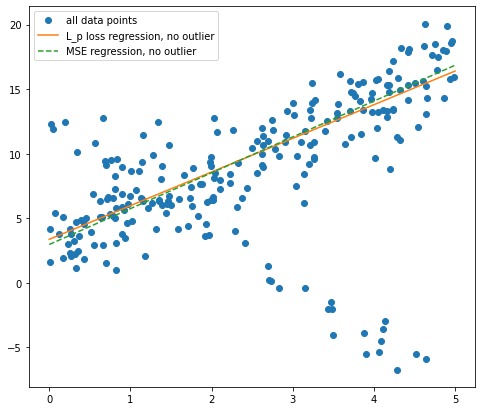

In [9]:
p = 4
def error(c):
    return np.abs(F(x,c) - y)**(p/2.0)

sol_high = least_squares(error,[0.0,0.0]).x
print(sol_high)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o", RANGE,F(RANGE,sol_high),"-",
         RANGE,F(RANGE,sol_mse),"--")
plt.legend(["all data points",
            "L_p loss regression, no outlier",
            "MSE regression, no outlier"]);

[0.78329347 5.16268326]


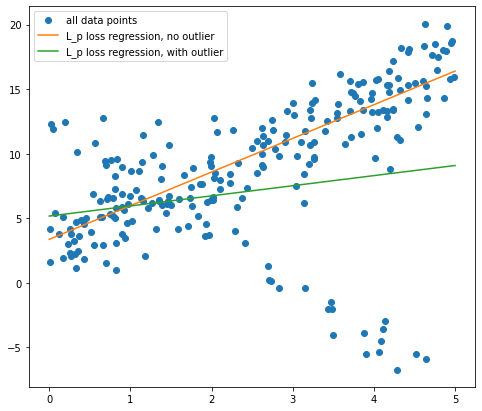

In [10]:
def error(c):
    return np.abs(F(x_c,c) - y_c)**(p/2.0)

sol_high_2 = least_squares(error,[0.0,0.0]).x
print(sol_high_2)
plt.figure(figsize=(8,7))
plt.plot(x_c,y_c,"o",
         RANGE,F(RANGE,sol_high),"-",
         RANGE,F(RANGE,sol_high_2),"-")
plt.legend(["all data points",
            "L_p loss regression, no outlier",
            "L_p loss regression, with outlier"]);

## In the limit...

* This converges to minimizing the maximum difference between ($f(x_i) = c_0 x_i + c_1$ and $y_i$)

* This is called: $L_\infty$ loss

* **Another way to express it:** minimize $z$ such that 

$$ |c_0 x_i + c_1 - y_i| \le z \qquad\mbox{for all $i$} $$

## In the limit...

* **Another way to express it:** minimize $z$ such that 

$$ |c_0 x_i + c_1 - y_i| \le z \qquad\mbox{for all $i$} $$

* **Linear programming formulation:** minimize $z$ such that

$$ c_0 x_i + c_1 - y_i \le z \qquad\mbox{for all $i$} $$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;and

$$ -(c_0 x_i + c_1 - y_i) \le z \qquad\mbox{for all $i$} $$



## 1D insight into the outlier sensitivity

* **Input:** set of points in $\mathbb R$

* What point minimizes MSE, MAE, ... as a representative of these points?

* MSE aka $L_2$: mean

* MAE aka $L_1$: median

* $L_\infty$: the mean of the maximum and minimum



## Something in between MSE and MAE?

* $L_p$ loss for $p \in (1,2)$?

* Huber loss:
  - quadratic for small distances
  - linear for large distances
  
  $$L_\delta(f(x),y) = \begin{cases}\frac{1}{2}(y-f(x))^2& \mbox{if $|y-f(x)| \le \delta$}\\
  \delta|y-f(x)| - \frac{1}{2}\delta^2& \mbox{otherwise}\\\end{cases}$$

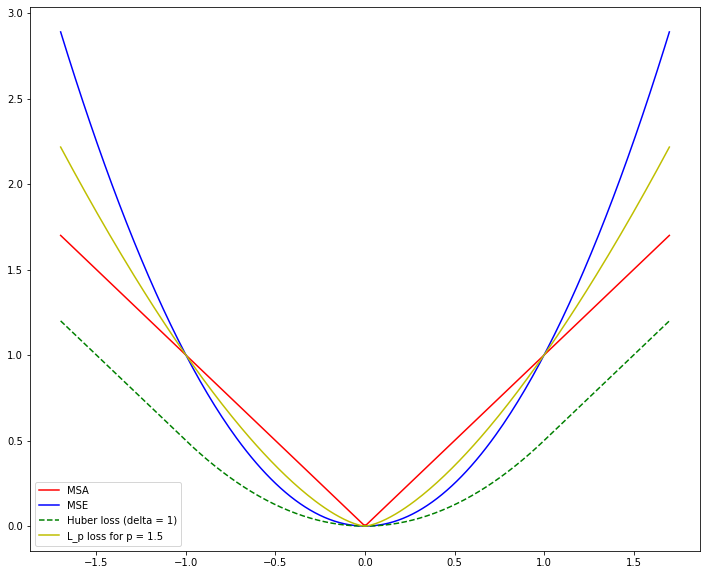

In [11]:
def huber(z, delta=1.0):
    return z**2/2 if abs(z) < delta \
    else delta*abs(z) - delta**2/2

xs = np.linspace(-1.7,1.7,num=250)
plt.figure(figsize=(12,10))
plt.plot(xs,np.abs(xs),"r-",xs,xs**2,"b-",
        xs,[huber(x) for x in xs],"g--",
        xs,np.abs(xs)**1.5,"y")
plt.legend(["MSA","MSE","Huber loss (delta = 1)",
            "L_p loss for p = 1.5"]);

## Different context: Clustering

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares

def generate_data():
    x1 = np.random.normal(size=100)/10
    y1 = np.random.normal(size=100)/10
    x2 = 1.0 + np.random.normal(size=100)/10
    y2 = 1.0 + np.random.normal(size=100)/10
    x3 = 1.0 + np.random.normal(size=30)/10
    y3 = np.random.normal(size=30)/10
    x4 = np.random.normal(size=30)/10
    y4 = 1.0 + np.random.normal(size=30)/10
    
    x = np.concatenate((x1,x2,x3,x4))
    y = np.concatenate((y1,y2,y3,y4))
    return (x,y)

x,y = generate_data()

def plot(c):
    plt.figure(figsize=(8,7))
    plt.scatter(x,y,10,"b");
    d = [c[i] for i in range(0, len(c), 2)]
    e = [c[i] for i in range(1, len(c), 2)]
    plt.scatter(d, e,100,"r");

def get_distances(c):
    q = (x - c[0])**2 + (y - c[1])**2
    r = (x - c[2])**2 + (y - c[3])**2
    return np.sqrt(np.minimum(q,r))

def get_distances2(c):
    q1 = (x - c[0])**2 + (y - c[1])**2
    q2 = (x - c[2])**2 + (y - c[3])**2
    q3 = (x - c[4])**2 + (y - c[5])**2
    q4 = (x - c[6])**2 + (y - c[7])**2
    return np.sqrt(np.amin(np.array([q1,q2,q3,q4])))

* $k$–means: uses MSE as the cost of a cluster (= sum of squared distances to the cluster center)



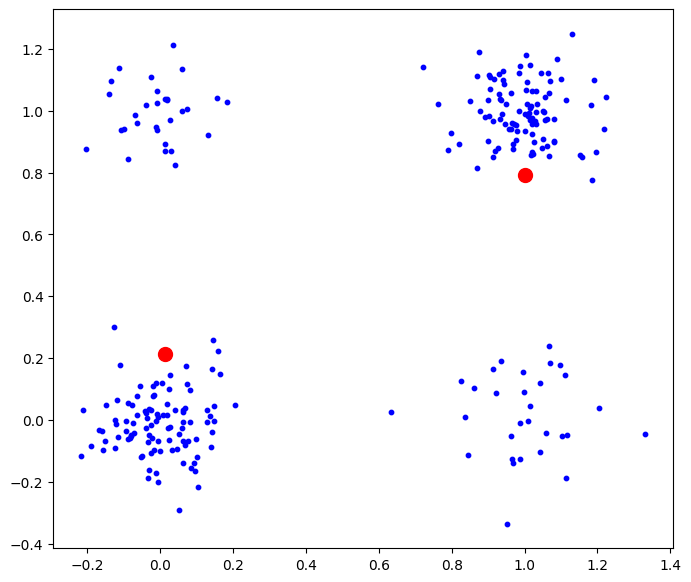

In [28]:
def kmeans():
    sol1 = least_squares(get_distances,[0.1,0.0,0.9,1.0])
    sol2 = least_squares(get_distances,[0.0,0.1,1.0,0.9])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)
kmeans()

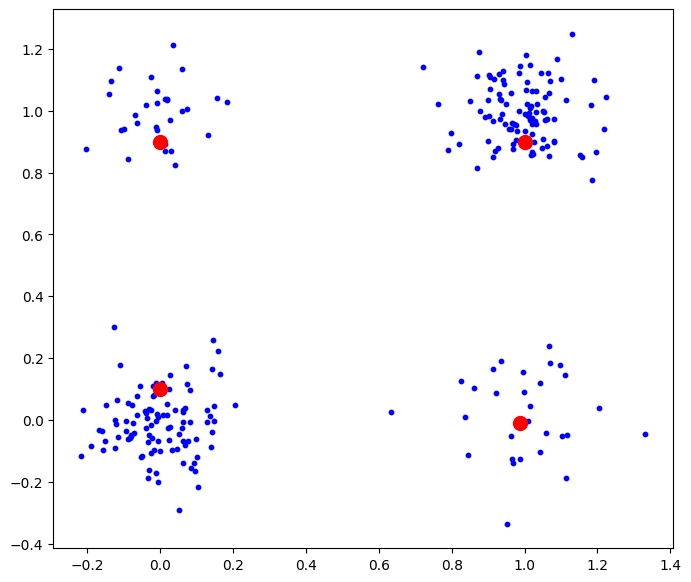

In [29]:
def kmeans():
    sol1 = least_squares(get_distances2,\
                         [0.1,0.0,0.9,1.0,0.1,1.0,0.9,0.0])
    sol2 = least_squares(get_distances2,\
                         [0.0,0.1,1.0,0.9,0.0,0.9,1.0,0.1])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)
kmeans()

## Different context: Clustering

* $k$–median: uses MAE as the cost of a cluster (= sum of distances to the center cluster)

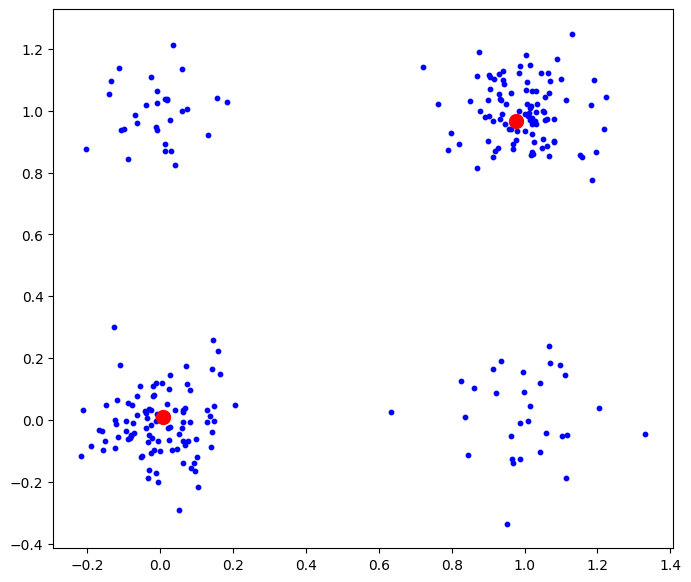

In [30]:
def kmedian():
    sqrt_distances = lambda c : np.sqrt(get_distances(c))
    sol1 = least_squares(sqrt_distances,[0.1,0.0,0.9,1.0])
    sol2 = least_squares(sqrt_distances,[0.0,0.1,1.0,0.9])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)

kmedian()

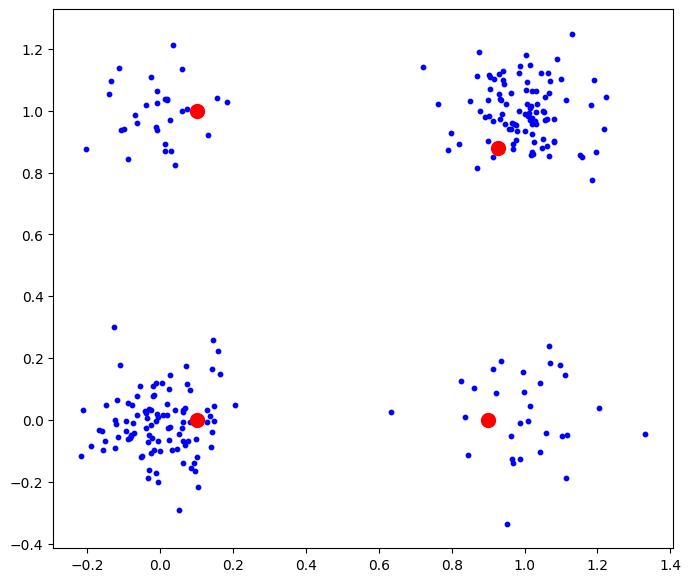

In [31]:
def kmedian():
    sqrt_distances = lambda c : np.sqrt(get_distances2(c))
    sol1 = least_squares(sqrt_distances,\
        [0.1,0.0,0.9,1.0,0.1,1.0,0.9,0.0])
    sol2 = least_squares(sqrt_distances,\
        [0.0,0.1,1.0,0.9,0.0,0.9,1.0,0.1])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)

kmedian()

## Different context: Clustering

* $k$–center: uses maximum distance of any point to the closest cluster center ($L_\infty$ loss like behavior)

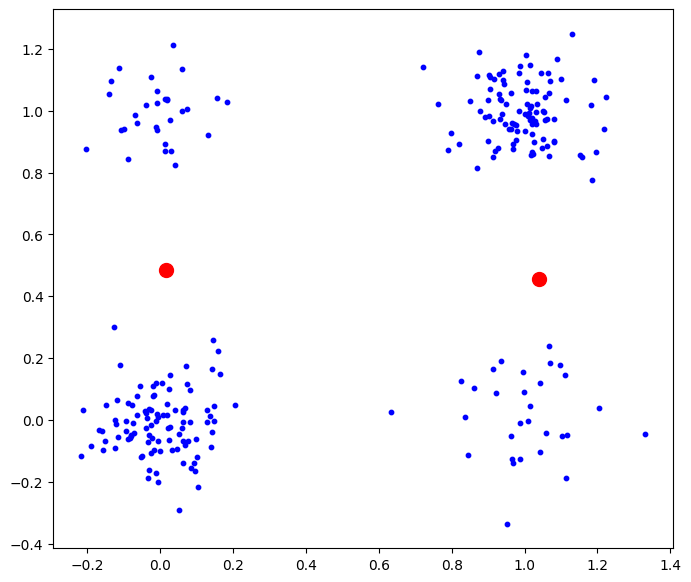

In [32]:
def kcenter():
    sqrt_distances = lambda c : get_distances(c).max()
    sol1 = least_squares(sqrt_distances,[0.1,0.0,0.0,1.0])
    sol2 = least_squares(sqrt_distances,[0.0,0.1,1.0,0.1])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)
kcenter()

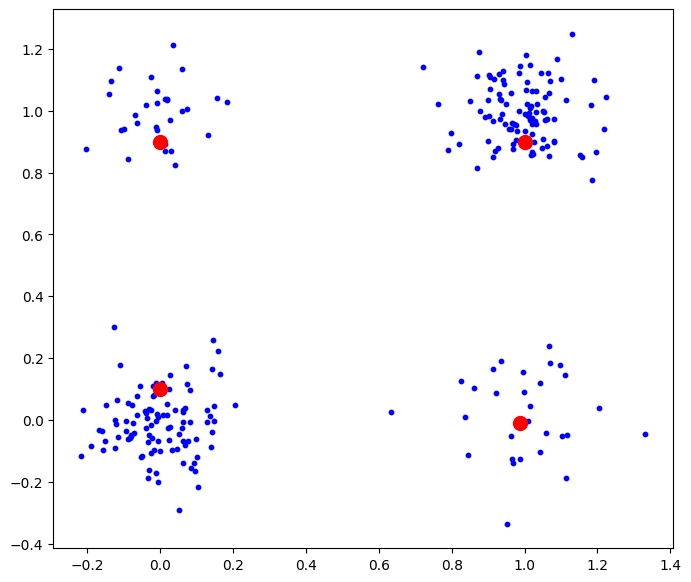

In [33]:
def kcenter():
    sqrt_distances = lambda c : get_distances2(c).max()
    sol1 = least_squares(sqrt_distances,\
        [0.1,0.0,0.9,1.0,0.1,1.0,0.9,0.0])
    sol2 = least_squares(sqrt_distances,\
        [0.0,0.1,1.0,0.9,0.0,0.9,1.0,0.1])
    if sol1.fun[0] < sol2.fun[0]:
        plot(sol1.x)
    else:
        plot(sol2.x)
kcenter()